In [1]:
import numpy as np
import matplotlib.pyplot as plt
from latency import run_latency, run_latency_changing_topo, run_latency_per_round, run_latency_per_round_changing_topo, nodes_latency

import sys
sys.path.append('..') 
from utils import create_mixing_matrix, load_data, run, consensus

# Base case

0-th round
average train loss 2.26 | test loss 2.25 | test acc: 0.433
1-th round
average train loss 4.01 | test loss 1.51 | test acc: 0.724
2-th round
average train loss 5.11 | test loss 0.77 | test acc: 0.799
3-th round
average train loss 5.91 | test loss 0.522 | test acc: 0.864
4-th round
average train loss 6.51 | test loss 0.4 | test acc: 0.895
5-th round
average train loss 6.97 | test loss 0.33 | test acc: 0.911
6-th round
average train loss 7.37 | test loss 0.277 | test acc: 0.923
7-th round
average train loss 7.73 | test loss 0.245 | test acc: 0.927
8-th round
average train loss 8.05 | test loss 0.22 | test acc: 0.934
9-th round
average train loss 8.31 | test loss 0.201 | test acc: 0.938
[0.022937, 0.020871, 0.020657, 0.021288, 0.022118, 0.021407, 0.023051, 0.020801, 0.020571, 0.021497, 0.021515, 0.018482, 0.018877, 0.020188, 0.020132, 0.019913, 0.019367, 0.018818, 0.019476, 0.019096, 0.020575, 0.018511, 0.019395, 0.0197, 0.019288, 0.01972, 0.019619, 0.020222, 0.019839, 0.018965,

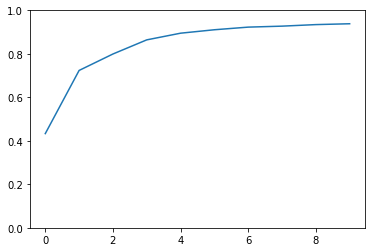

In [2]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

# Latency with fixed topology

0-th round
average train loss 2.3 | test loss 2.29 | test acc: 0.127
1-th round
average train loss 4.57 | test loss 2.28 | test acc: 0.427
2-th round
average train loss 6.7 | test loss 2.19 | test acc: 0.659
3-th round
average train loss 8.23 | test loss 1.58 | test acc: 0.783
4-th round
average train loss 9.41 | test loss 1.13 | test acc: 0.821
5-th round
average train loss 10.3 | test loss 0.907 | test acc: 0.859
6-th round
average train loss 11.2 | test loss 0.758 | test acc: 0.884
7-th round
average train loss 11.9 | test loss 0.693 | test acc: 0.901
8-th round
average train loss 12.6 | test loss 0.64 | test acc: 0.903
9-th round
average train loss 13.3 | test loss 0.58 | test acc: 0.913
[1.081684, 1.038212, 0.730912, 0.356245, 0.149424, 0.134768, 0.16335, 0.254151, 0.471264, 0.753668, 1.060893, 0.748097, 0.247592, 0.042085, 0.264553, 0.047126, 0.113146, 0.375693, 0.675868, 0.905346, 0.915556, 0.422744, 0.038956, 1.486416, 6.22252, 0.950911, 0.022734, 0.277226, 0.64629, 0.864005, 0

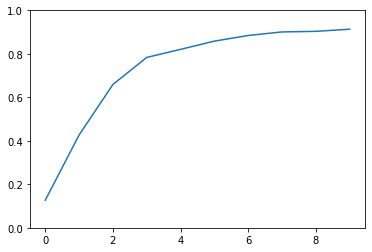

In [3]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 2)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_latency(train_loader, test_loader, comm_matrix, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

0-th round
average train loss 2.28 | test loss 2.28 | test acc: 0.198
1-th round
average train loss 4.48 | test loss 2.25 | test acc: 0.610
2-th round
average train loss 6.18 | test loss 1.92 | test acc: 0.743
3-th round
average train loss 7.48 | test loss 1.61 | test acc: 0.804
4-th round
average train loss 8.57 | test loss 1.45 | test acc: 0.835
5-th round
average train loss 9.56 | test loss 1.31 | test acc: 0.879
6-th round
average train loss 10.5 | test loss 1.27 | test acc: 0.889
7-th round
average train loss 11.4 | test loss 1.2 | test acc: 0.897
8-th round
average train loss 12.3 | test loss 1.17 | test acc: 0.906
9-th round
average train loss 13.1 | test loss 1.13 | test acc: 0.910
[0.02526, 0.479344, 0.704709, 0.211458, 0.41053, 3.43922, 1.750594, 3.667331, 3.451542, 3.671544, 0.174052, 0.567635, 0.526685, 0.012606, 3.43922, 3.43922, 3.669038, 1.222978, 3.671544, 0.126492, 0.236401, 0.500143, 0.582298, 0.197174, 0.145288, 3.669038, 0.08534, 0.048122, 0.040456, 0.060525, 0.0443

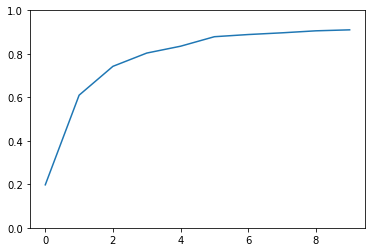

In [4]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 4)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_latency(train_loader, test_loader, comm_matrix, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

0-th round
average train loss 2.29 | test loss 2.29 | test acc: 0.345
1-th round
average train loss 4.55 | test loss 2.29 | test acc: 0.180
2-th round
average train loss 6.63 | test loss 2.28 | test acc: 0.375
3-th round
average train loss 8.44 | test loss 2.22 | test acc: 0.646
4-th round
average train loss 10 | test loss 2.16 | test acc: 0.753
5-th round
average train loss 11.4 | test loss 2.13 | test acc: 0.770
6-th round
average train loss 12.8 | test loss 2.11 | test acc: 0.822
7-th round
average train loss 14.2 | test loss 2.09 | test acc: 0.823
8-th round
average train loss 15.5 | test loss 2.09 | test acc: 0.840
9-th round
average train loss 16.8 | test loss 2.08 | test acc: 0.845
[0.096552, 1.060949, 1.621927, 0.988897, 0.017448, 0.790157, 0.051155, 0.247516, 0.021037, 0.767636, 0.720432, 0.072728, 0.678508, 0.240893, 0.790157, 0.790157, 0.884934, 0.065111, 0.767636, 0.767636, 0.858017, 0.899066, 0.354525, 0.327395, 0.038357, 0.884934, 0.120282, 0.097914, 0.310638, 0.804869, 0

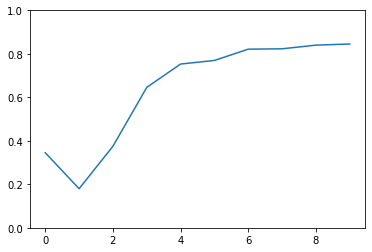

In [5]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 8)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs8 = run_latency(train_loader, test_loader, comm_matrix, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs8)
plt.show()

0-th round
average train loss 2.28 | test loss 2.29 | test acc: 0.114
1-th round
average train loss 4.54 | test loss 2.3 | test acc: 0.114
2-th round
average train loss 6.71 | test loss 2.3 | test acc: 0.114
3-th round
average train loss 8.82 | test loss 2.3 | test acc: 0.114
4-th round
average train loss 10.9 | test loss 2.3 | test acc: 0.114
5-th round
average train loss 12.9 | test loss 2.3 | test acc: 0.114
6-th round
average train loss 15 | test loss 2.3 | test acc: 0.114
7-th round
average train loss 17 | test loss 2.3 | test acc: 0.114
8-th round
average train loss 19 | test loss 2.3 | test acc: 0.114
9-th round
average train loss 21 | test loss 2.3 | test acc: 0.114
[0.055916, 0.057801, 0.057915, 0.057996, 0.054914, 0.057937, 0.05797, 0.058008, 0.053158, 0.056073, 0.056234, 0.057972, 0.057345, 0.057977, 0.057982, 0.057982, 0.058, 0.141494, 0.002985, 0.057626, 0.054584, 0.057366, 0.057328, 0.057839, 0.057982, 0.058011, 0.486926, 0.292018, 0.003544, 0.05296, 0.05296, 0.010448, 0.

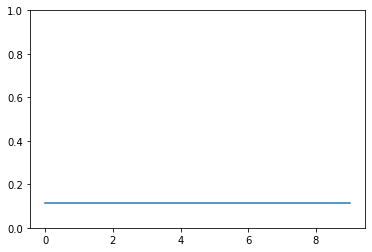

In [6]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 16)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs16 = run_latency(train_loader, test_loader, comm_matrix, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs16)
plt.show()

0-th round
average train loss 2.27 | test loss 2.3 | test acc: 0.201
1-th round
average train loss 4.55 | test loss 2.3 | test acc: 0.114
2-th round
average train loss 6.82 | test loss 2.3 | test acc: 0.114
3-th round
average train loss 9.12 | test loss 2.3 | test acc: 0.114
4-th round
average train loss 11.4 | test loss 2.3 | test acc: 0.114
5-th round
average train loss 13.7 | test loss 2.3 | test acc: 0.114
6-th round
average train loss 16 | test loss 2.3 | test acc: 0.114
7-th round
average train loss 18.3 | test loss 2.3 | test acc: 0.114
8-th round
average train loss 20.6 | test loss 2.3 | test acc: 0.114
9-th round
average train loss 22.9 | test loss 2.3 | test acc: 0.114
[8e-06, 1.2e-05, 3e-06, 6e-06, 6e-06, 7e-06, 1.2e-05, 7e-06, 1.1e-05, 3e-06, 5e-06, 0.000259, 0.000296, 1.2e-05, 1.1e-05, 1.2e-05, 0.000597, 0.000584, 9e-06, 2e-06, 3e-06, 1.1e-05, 0.000278, 1.1e-05, 6e-06, 1.2e-05, 7e-06, 0.00027, 5e-06, 3e-06, 1.1e-05, 0.000213, 1e-05, 7e-06, 5e-06, 5e-06, 7e-06, 7e-06, 0.000

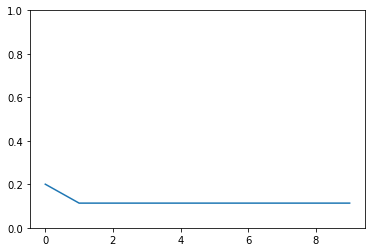

In [7]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 32)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs32 = run_latency(train_loader, test_loader, comm_matrix, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs32)
plt.show()

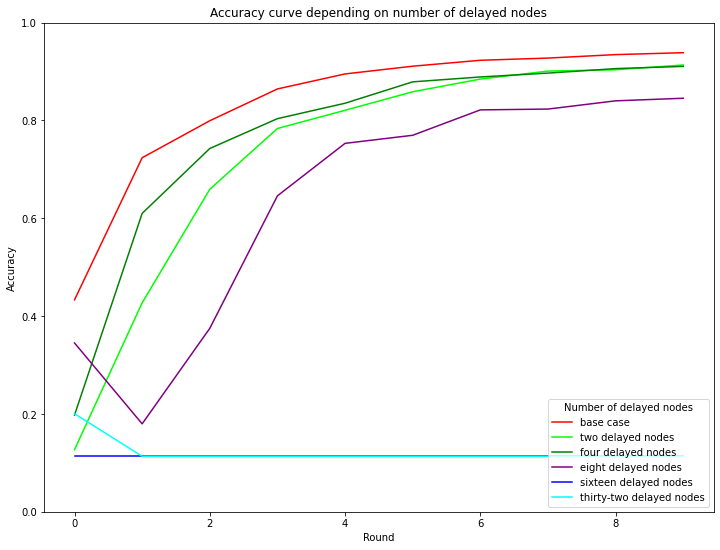

In [8]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="red", label="base case")
ax.plot(x, accs2, color="lime", label="two delayed nodes")
ax.plot(x, accs4, color="green", label="four delayed nodes")
ax.plot(x, accs8, color="purple", label="eight delayed nodes")
ax.plot(x, accs16, color="blue", label="sixteen delayed nodes")
ax.plot(x, accs32, color="cyan", label="thirty-two delayed nodes")

plt.legend(loc="lower right", title="Number of delayed nodes")
plt.title("Accuracy curve depending on number of delayed nodes")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

# Latency with changing topology

old topo: grid, new topo: grid
0-th round
average train loss 2.24 | test loss 2.24 | test acc: 0.521
old topo: grid, new topo: grid
1-th round
average train loss 4.04 | test loss 1.8 | test acc: 0.746
old topo: grid, new topo: ring
2-th round
average train loss 5.24 | test loss 1.22 | test acc: 0.802
old topo: ring, new topo: grid
3-th round
average train loss 6.18 | test loss 0.914 | test acc: 0.854
old topo: grid, new topo: centralized
4-th round
average train loss 7.03 | test loss 0.778 | test acc: 0.882
old topo: centralized, new topo: centralized
5-th round
average train loss 7.78 | test loss 0.669 | test acc: 0.901
old topo: centralized, new topo: centralized
6-th round
average train loss 8.45 | test loss 0.608 | test acc: 0.911
old topo: centralized, new topo: ring
7-th round
average train loss 9.1 | test loss 0.563 | test acc: 0.920
old topo: ring, new topo: grid
8-th round
average train loss 9.72 | test loss 0.527 | test acc: 0.926
old topo: grid, new topo: grid
9-th round
ave

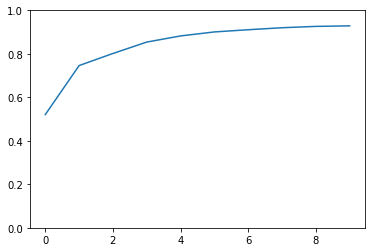

In [9]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 2)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2_ = run_latency_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2_)
plt.show()

old topo: centralized, new topo: centralized
0-th round
average train loss 2.28 | test loss 2.28 | test acc: 0.200
old topo: centralized, new topo: ring
1-th round
average train loss 4.49 | test loss 2.3 | test acc: 0.098
old topo: ring, new topo: ring
2-th round
average train loss 6.8 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
3-th round
average train loss 9.1 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: ring
4-th round
average train loss 11.4 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: centralized
5-th round
average train loss 13.7 | test loss 2.3 | test acc: 0.114
old topo: centralized, new topo: ring
6-th round
average train loss 16 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
7-th round
average train loss 18.3 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: ring
8-th round
average train loss 20.6 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
9-th round
average train loss 22.9 | 

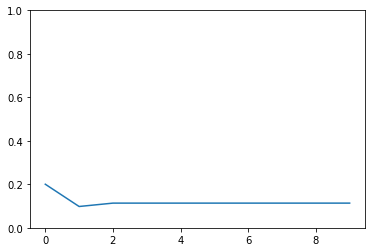

In [10]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 4)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4_ = run_latency_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4_)
plt.show()

old topo: centralized, new topo: grid
0-th round
average train loss 2.29 | test loss 2.29 | test acc: 0.117
old topo: grid, new topo: ring
1-th round
average train loss 4.55 | test loss 2.3 | test acc: 0.101
old topo: ring, new topo: centralized
2-th round
average train loss 6.85 | test loss 2.3 | test acc: 0.114
old topo: centralized, new topo: ring
3-th round
average train loss 9.15 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: ring
4-th round
average train loss 11.5 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
5-th round
average train loss 13.8 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: grid
6-th round
average train loss 16.1 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: centralized
7-th round
average train loss 18.4 | test loss 2.3 | test acc: 0.114
old topo: centralized, new topo: centralized
8-th round
average train loss 20.7 | test loss 2.3 | test acc: 0.114
old topo: centralized, new topo: grid
9-th round
average 

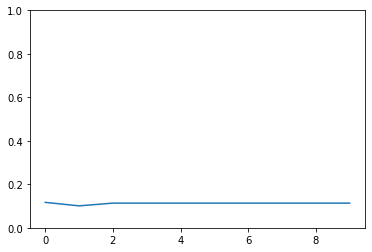

In [11]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 8)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs8_ = run_latency_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs8_)
plt.show()

old topo: ring, new topo: centralized
0-th round
average train loss 2.28 | test loss 2.29 | test acc: 0.330
old topo: centralized, new topo: ring
1-th round
average train loss 4.46 | test loss 2.28 | test acc: 0.474
old topo: ring, new topo: grid
2-th round
average train loss 6.26 | test loss 2.18 | test acc: 0.686
old topo: grid, new topo: grid
3-th round
average train loss 7.81 | test loss 2.08 | test acc: 0.806
old topo: grid, new topo: centralized
4-th round
average train loss 9.18 | test loss 2.03 | test acc: 0.850
old topo: centralized, new topo: centralized
5-th round
average train loss 10.5 | test loss 2 | test acc: 0.872
old topo: centralized, new topo: centralized
6-th round
average train loss 11.7 | test loss 1.96 | test acc: 0.882
old topo: centralized, new topo: ring
7-th round
average train loss 13 | test loss 1.96 | test acc: 0.895
old topo: ring, new topo: ring
8-th round
average train loss 14.1 | test loss 1.94 | test acc: 0.903
old topo: ring, new topo: grid
9-th roun

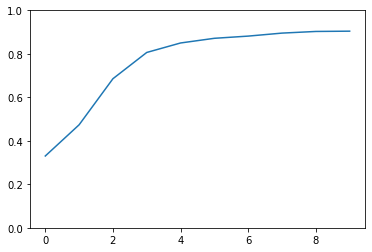

In [12]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 16)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs16_ = run_latency_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs16_)
plt.show()

old topo: grid, new topo: ring
0-th round
average train loss 2.28 | test loss 2.3 | test acc: 0.101
old topo: ring, new topo: ring
1-th round
average train loss 4.57 | test loss 2.3 | test acc: 0.101
old topo: ring, new topo: centralized
2-th round
average train loss 6.85 | test loss 2.3 | test acc: 0.101
old topo: centralized, new topo: centralized
3-th round
average train loss 9.14 | test loss 2.3 | test acc: 0.114
old topo: centralized, new topo: ring
4-th round
average train loss 11.4 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
5-th round
average train loss 13.7 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: ring
6-th round
average train loss 16 | test loss 2.3 | test acc: 0.114
old topo: ring, new topo: grid
7-th round
average train loss 18.3 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: grid
8-th round
average train loss 20.6 | test loss 2.3 | test acc: 0.114
old topo: grid, new topo: ring
9-th round
average train loss 22.9 | test l

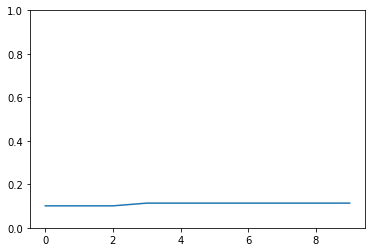

In [13]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 32)

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs32_ = run_latency_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs32_)
plt.show()

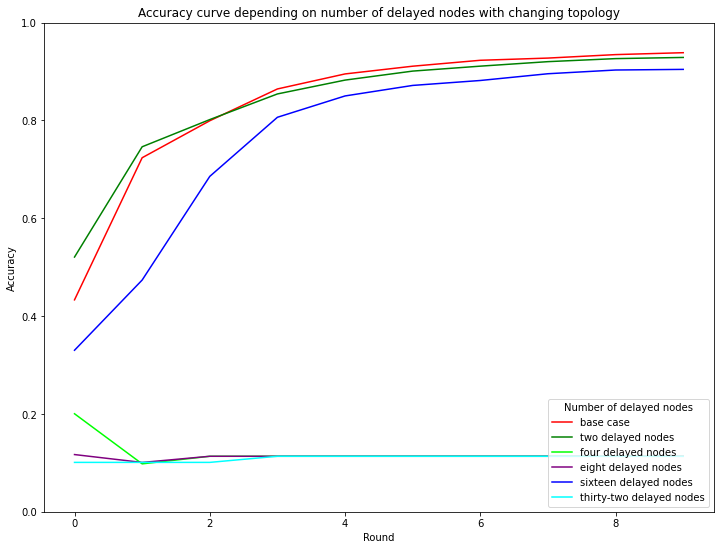

In [14]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="red", label="base case")
ax.plot(x, accs2_, color="lime", label="two delayed nodes")
ax.plot(x, accs4_, color="green", label="four delayed nodes")
ax.plot(x, accs8_, color="purple", label="eight delayed nodes")
ax.plot(x, accs16_, color="blue", label="sixteen delayed nodes")
ax.plot(x, accs32_, color="cyan", label="thirty-two delayed nodes")


plt.legend(loc="lower right", title="Number of delayed nodes")
plt.title("Accuracy curve depending on number of delayed nodes with changing topology")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

# Latency on a few rounds

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


round 0, normal
0-th round
average train loss 2.26 | test loss 2.25 | test acc: 0.421
round 1, normal
1-th round
average train loss 3.99 | test loss 1.5 | test acc: 0.702
round 2, normal
2-th round
average train loss 5.11 | test loss 0.797 | test acc: 0.785
round 3, delay
3-th round
average train loss 5.86 | test loss 0.556 | test acc: 0.862
round 4, delay recovery
4-th round
average train loss 6.44 | test loss 0.562 | test acc: 0.889
round 5, normal
5-th round
average train loss 7.12 | test loss 0.471 | test acc: 0.910
round 6, normal
6-th round
average train loss 7.65 | test loss 0.326 | test acc: 0.915
round 7, delay
7-th round
average train loss 8.09 | test loss 0.299 | test acc: 0.922
round 8, delay recovery
8-th round
average train loss 8.5 | test loss 0.34 | test acc: 0.930
round 9, normal
9-th round
average train loss 9.04 | test loss 0.313 | test acc: 0.936
[1.166377, 1.834961, 0.857721, 0.042697, 0.063547, 0.18126, 0.277253, 0.283065, 0.175862, 0.020285, 0.019355, 0.041683, 0

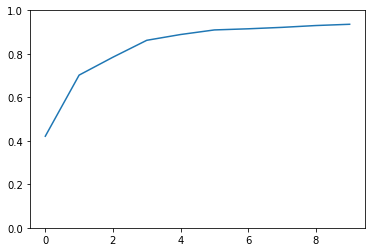

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 2)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_latency_per_round(train_loader, test_loader, comm_matrix,
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

round 0, normal
0-th round
average train loss 2.27 | test loss 2.26 | test acc: 0.111
round 1, normal
1-th round
average train loss 4.13 | test loss 1.7 | test acc: 0.653
round 2, normal
2-th round
average train loss 5.28 | test loss 0.821 | test acc: 0.796
round 3, delay
3-th round
average train loss 6.12 | test loss 0.666 | test acc: 0.848
round 4, delay recovery
4-th round
average train loss 6.78 | test loss 0.917 | test acc: 0.882
round 5, normal
5-th round
average train loss 7.64 | test loss 0.782 | test acc: 0.901
round 6, normal
6-th round
average train loss 8.33 | test loss 0.405 | test acc: 0.907
round 7, delay
7-th round
average train loss 8.84 | test loss 0.389 | test acc: 0.913
round 8, delay recovery
8-th round
average train loss 9.29 | test loss 0.681 | test acc: 0.921
round 9, normal
9-th round
average train loss 10 | test loss 0.608 | test acc: 0.927
[0.400068, 0.248191, 0.741911, 0.779332, 0.420436, 0.352372, 0.92416, 1.307567, 1.356909, 3.305896, 0.127932, 0.284976, 0

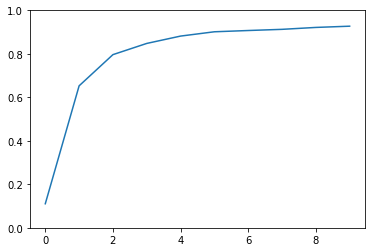

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 4)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_latency_per_round(train_loader, test_loader, comm_matrix,
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

round 0, normal
0-th round
average train loss 2.28 | test loss 2.28 | test acc: 0.190
round 1, normal
1-th round
average train loss 4.45 | test loss 2.15 | test acc: 0.638
round 2, normal
2-th round
average train loss 5.96 | test loss 1.13 | test acc: 0.721
round 3, delay
3-th round
average train loss 6.9 | test loss 0.966 | test acc: 0.800
round 4, delay recovery
4-th round
average train loss 7.67 | test loss 1.46 | test acc: 0.852
round 5, normal
5-th round
average train loss 8.77 | test loss 1.34 | test acc: 0.884
round 6, normal
6-th round
average train loss 9.67 | test loss 0.585 | test acc: 0.888
round 7, delay
7-th round
average train loss 10.3 | test loss 0.607 | test acc: 0.899
round 8, delay recovery
8-th round
average train loss 10.8 | test loss 1.29 | test acc: 0.906
round 9, normal
9-th round
average train loss 11.9 | test loss 1.2 | test acc: 0.918
[0.251846, 0.087644, 0.148927, 0.250933, 0.081334, 0.402571, 2.172259, 1.941908, 1.855172, 1.105616, 0.094505, 0.286124, 1.08

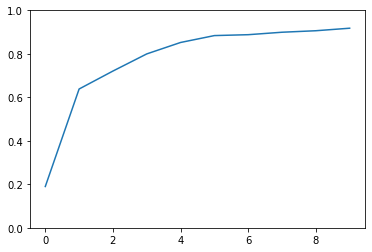

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 8)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run_latency_per_round(train_loader, test_loader, comm_matrix,
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

round 0, normal
0-th round
average train loss 2.21 | test loss 2.19 | test acc: 0.520
round 1, normal
1-th round
average train loss 3.77 | test loss 1.2 | test acc: 0.688
round 2, normal
2-th round
average train loss 4.77 | test loss 0.696 | test acc: 0.822
round 3, delay
3-th round
average train loss 5.53 | test loss 1.2 | test acc: 0.870
round 4, delay recovery
4-th round
average train loss 6.3 | test loss 2.13 | test acc: 0.849
round 5, normal
5-th round
average train loss 7.89 | test loss 2.09 | test acc: 0.865
round 6, normal
6-th round
average train loss 9.14 | test loss 1.14 | test acc: 0.859
round 7, delay
7-th round
average train loss 9.95 | test loss 1.22 | test acc: 0.879
round 8, delay recovery
8-th round
average train loss 10.7 | test loss 2.14 | test acc: 0.863
round 9, normal
9-th round
average train loss 12.3 | test loss 2.09 | test acc: 0.883
[0.282392, 0.055487, 0.029005, 0.299041, 0.499274, 0.011152, 0.410203, 0.820023, 1.769118, 0.584178, 1.317929, 0.739027, 0.00730

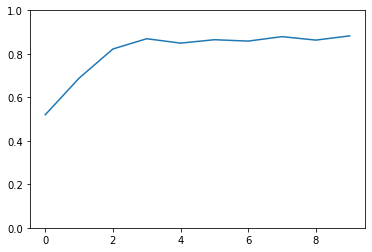

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 16)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run_latency_per_round(train_loader, test_loader, comm_matrix,
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

round 0, normal
0-th round
average train loss 2.28 | test loss 2.28 | test acc: 0.232
round 1, normal
1-th round
average train loss 4.45 | test loss 2.15 | test acc: 0.440
round 2, normal
2-th round
average train loss 6.04 | test loss 1.19 | test acc: 0.756
round 3, delay
3-th round
average train loss 6.99 | test loss 2.04 | test acc: 0.790
round 4, delay recovery
4-th round
average train loss 8.3 | test loss 2.29 | test acc: 0.369
round 5, normal
5-th round
average train loss 10.3 | test loss 2.27 | test acc: 0.421
round 6, normal
6-th round
average train loss 12.3 | test loss 2.15 | test acc: 0.752
round 7, delay
7-th round
average train loss 13.8 | test loss 2.2 | test acc: 0.713
round 8, delay recovery
8-th round
average train loss 15.5 | test loss 2.3 | test acc: 0.114
round 9, normal
9-th round
average train loss 17.6 | test loss 2.29 | test acc: 0.114
[0.660707, 0.326132, 0.047158, 0.020113, 0.003394, 0.011825, 0.168548, 0.001875, 0.008823, 0.13211, 0.16779, 0.378947, 0.085754, 

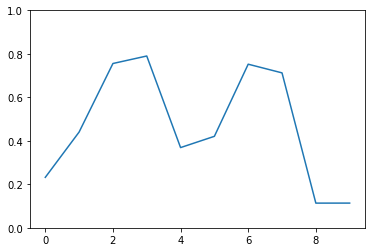

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 32)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run_latency_per_round(train_loader, test_loader, comm_matrix,
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

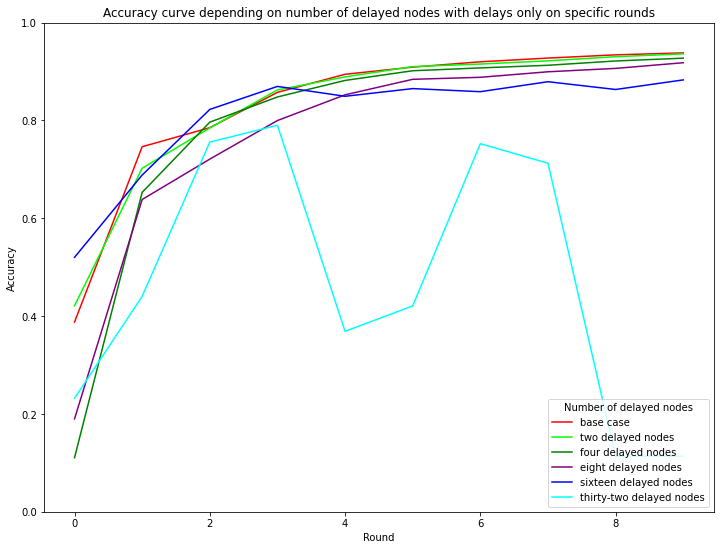

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="red", label="base case")
ax.plot(x, accs1, color="lime", label="two delayed nodes")
ax.plot(x, accs2, color="green", label="four delayed nodes")
ax.plot(x, accs3, color="purple", label="eight delayed nodes")
ax.plot(x, accs4, color="blue", label="sixteen delayed nodes")
ax.plot(x, accs5, color="cyan", label="thirty-two delayed nodes")



plt.legend(loc="lower right", title="Number of delayed nodes")
plt.title("Accuracy curve depending on number of delayed nodes with delays only on specific rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

# Latency on a few rounds with changing topology

round 0, normal
old topo: centralized, new topo: ring
0-th round
average train loss 2.26 | test loss 2.26 | test acc: 0.325
round 1, normal
old topo: ring, new topo: ring
1-th round
average train loss 4.14 | test loss 1.7 | test acc: 0.696
round 2, normal
old topo: ring, new topo: ring
2-th round
average train loss 5.31 | test loss 0.809 | test acc: 0.792
round 3, delay
old topo: ring, new topo: centralized
3-th round
average train loss 6.14 | test loss 0.593 | test acc: 0.853
round 4, delay recovery
old topo: centralized, new topo: ring
4-th round
average train loss 6.81 | test loss 2.3 | test acc: 0.098
round 5, normal
old topo: ring, new topo: centralized
5-th round
average train loss 9.11 | test loss 2.3 | test acc: 0.114
round 6, normal
old topo: centralized, new topo: grid
6-th round
average train loss 11.4 | test loss 2.3 | test acc: 0.114
round 7, delay
old topo: grid, new topo: grid
7-th round
average train loss 13.7 | test loss 2.3 | test acc: 0.114
round 8, delay recovery
ol

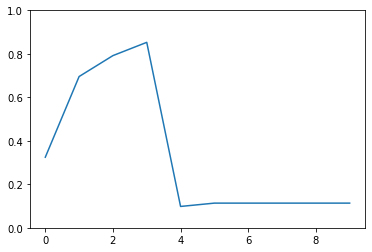

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 2)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1_ = run_latency_per_round_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1_)
plt.show()

round 0, normal
old topo: grid, new topo: grid
0-th round
average train loss 2.27 | test loss 2.26 | test acc: 0.321
round 1, normal
old topo: grid, new topo: grid
1-th round
average train loss 4.09 | test loss 1.65 | test acc: 0.687
round 2, normal
old topo: grid, new topo: grid
2-th round
average train loss 5.24 | test loss 0.823 | test acc: 0.790
round 3, delay
old topo: grid, new topo: centralized
3-th round
average train loss 6.04 | test loss 0.664 | test acc: 0.853
round 4, delay recovery
old topo: centralized, new topo: centralized
4-th round
average train loss 6.72 | test loss 0.932 | test acc: 0.885
round 5, normal
old topo: centralized, new topo: centralized
5-th round
average train loss 7.57 | test loss 0.759 | test acc: 0.902
round 6, normal
old topo: centralized, new topo: ring
6-th round
average train loss 8.24 | test loss 0.387 | test acc: 0.904
round 7, delay
old topo: ring, new topo: centralized
7-th round
average train loss 8.7 | test loss 0.365 | test acc: 0.917
roun

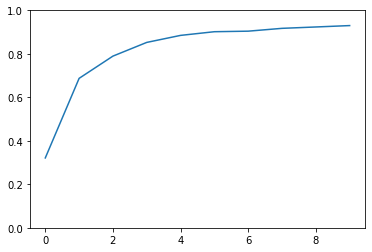

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 4)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2_ = run_latency_per_round_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2_)
plt.show()

round 0, normal
old topo: centralized, new topo: ring
0-th round
average train loss 2.29 | test loss 2.28 | test acc: 0.283
round 1, normal
old topo: ring, new topo: centralized
1-th round
average train loss 4.48 | test loss 2.18 | test acc: 0.582
round 2, normal
old topo: centralized, new topo: grid
2-th round
average train loss 6.01 | test loss 1.18 | test acc: 0.748
round 3, delay
old topo: grid, new topo: centralized
3-th round
average train loss 6.94 | test loss 1.06 | test acc: 0.829
round 4, delay recovery
old topo: centralized, new topo: grid
4-th round
average train loss 7.79 | test loss 2.3 | test acc: 0.114
round 5, normal
old topo: grid, new topo: grid
5-th round
average train loss 10.1 | test loss 2.3 | test acc: 0.114
round 6, normal
old topo: grid, new topo: centralized
6-th round
average train loss 12.4 | test loss 2.3 | test acc: 0.114
round 7, delay
old topo: centralized, new topo: grid
7-th round
average train loss 14.7 | test loss 2.3 | test acc: 0.114
round 8, dela

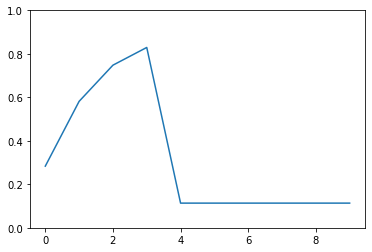

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 8)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3_ = run_latency_per_round_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3_)
plt.show()

round 0, normal
old topo: centralized, new topo: centralized
0-th round
average train loss 2.29 | test loss 2.28 | test acc: 0.244
round 1, normal
old topo: centralized, new topo: ring
1-th round
average train loss 4.52 | test loss 2.22 | test acc: 0.440
round 2, normal
old topo: ring, new topo: centralized
2-th round
average train loss 6.21 | test loss 1.48 | test acc: 0.705
round 3, delay
old topo: centralized, new topo: centralized
3-th round
average train loss 7.28 | test loss 1.66 | test acc: 0.793
round 4, delay recovery
old topo: centralized, new topo: grid
4-th round
average train loss 8.22 | test loss 2.3 | test acc: 0.114
round 5, normal
old topo: grid, new topo: ring
5-th round
average train loss 10.5 | test loss 2.3 | test acc: 0.114
round 6, normal
old topo: ring, new topo: grid
6-th round
average train loss 12.8 | test loss 2.3 | test acc: 0.114
round 7, delay
old topo: grid, new topo: ring
7-th round
average train loss 15.1 | test loss 2.3 | test acc: 0.114
round 8, dela

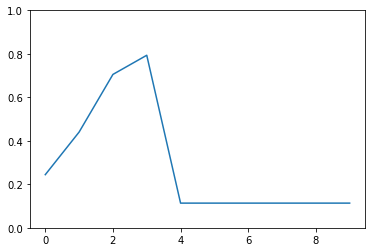

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 16)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4_ = run_latency_per_round_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4_)
plt.show()

round 0, normal
old topo: centralized, new topo: ring
0-th round
average train loss 2.28 | test loss 2.28 | test acc: 0.155
round 1, normal
old topo: ring, new topo: ring
1-th round
average train loss 4.43 | test loss 2.11 | test acc: 0.655
round 2, normal
old topo: ring, new topo: ring
2-th round
average train loss 5.81 | test loss 1.02 | test acc: 0.752
round 3, delay
old topo: ring, new topo: grid
3-th round
average train loss 6.72 | test loss 2.09 | test acc: 0.830
round 4, delay recovery
old topo: grid, new topo: ring
4-th round
average train loss 7.92 | test loss 2.3 | test acc: 0.114
round 5, normal
old topo: ring, new topo: ring
5-th round
average train loss 10.2 | test loss 2.3 | test acc: 0.114
round 6, normal
old topo: ring, new topo: grid
6-th round
average train loss 12.5 | test loss 2.3 | test acc: 0.114
round 7, delay
old topo: grid, new topo: centralized
7-th round
average train loss 14.8 | test loss 2.3 | test acc: 0.114
round 8, delay recovery
old topo: centralized, n

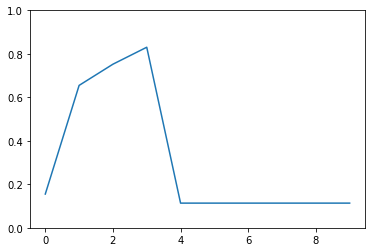

In [ ]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32
latency_nodes = nodes_latency(num_clients, 32)
latency_rounds = np.array([3, 7])

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5_ = run_latency_per_round_changing_topo(train_loader, test_loader, 
                                                num_rounds, epochs, num_clients, latency_nodes, latency_rounds)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5_)
plt.show()

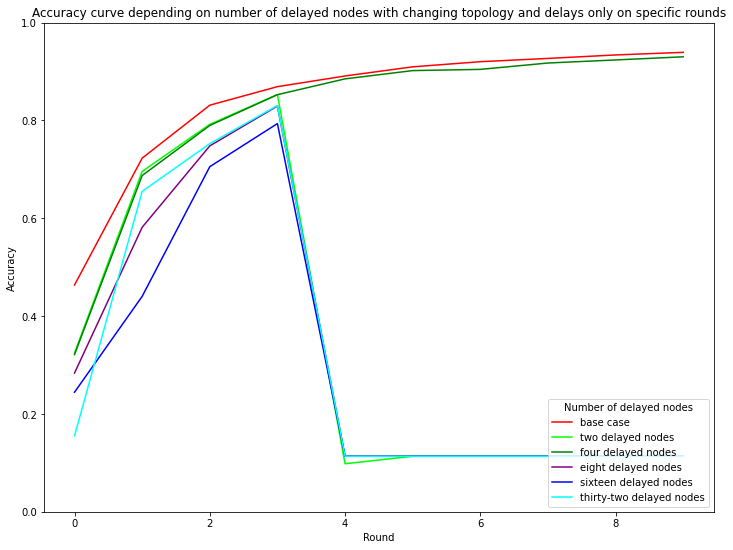

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="red", label="base case")
ax.plot(x, accs1_, color="lime", label="two delayed nodes")
ax.plot(x, accs2_, color="green", label="four delayed nodes")
ax.plot(x, accs3_, color="purple", label="eight delayed nodes")
ax.plot(x, accs4_, color="blue", label="sixteen delayed nodes")
ax.plot(x, accs5_, color="cyan", label="thirty-two delayed nodes")


plt.legend(loc="lower right", title="Number of delayed nodes")
plt.title("Accuracy curve depending on number of delayed nodes with changing topology and delays only on specific rounds")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()